In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (1).csv


In [3]:
titanic_df = pd.read_csv('Titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
missing_values = titanic_df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


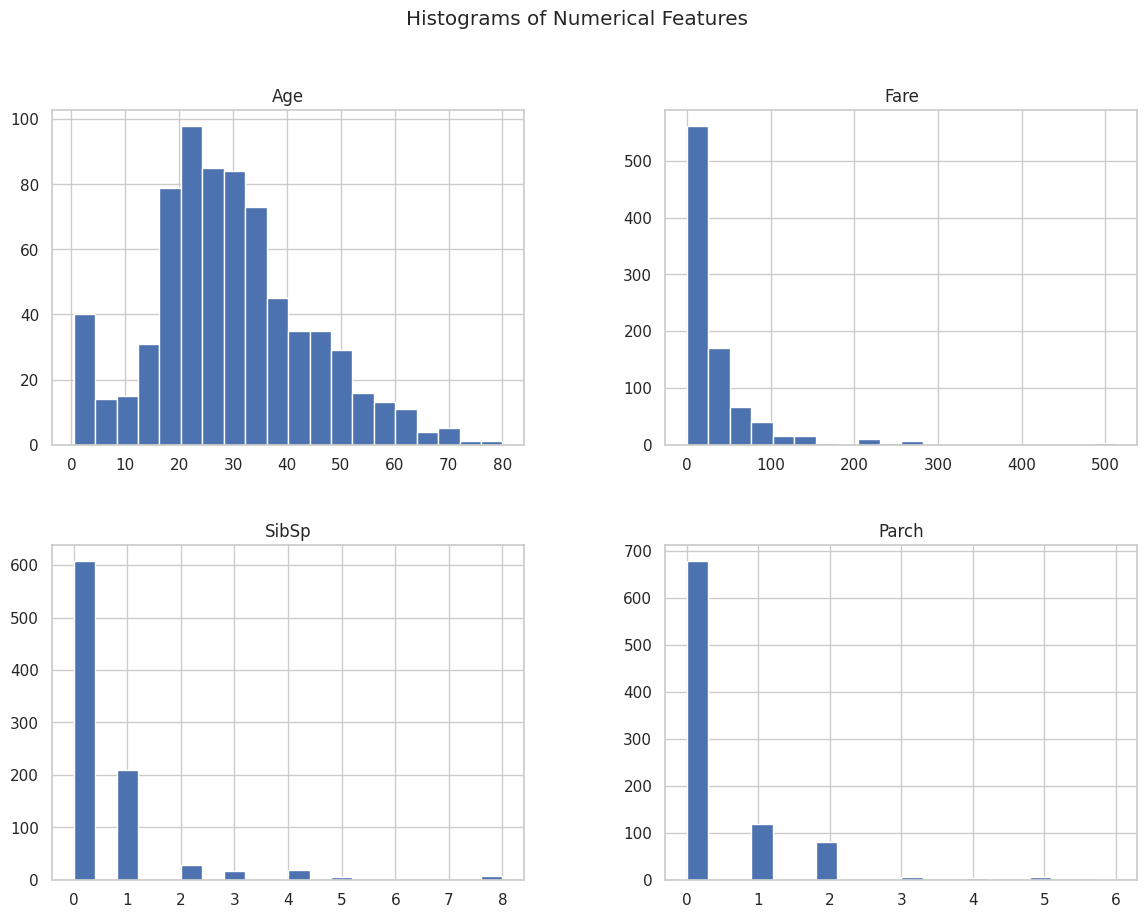

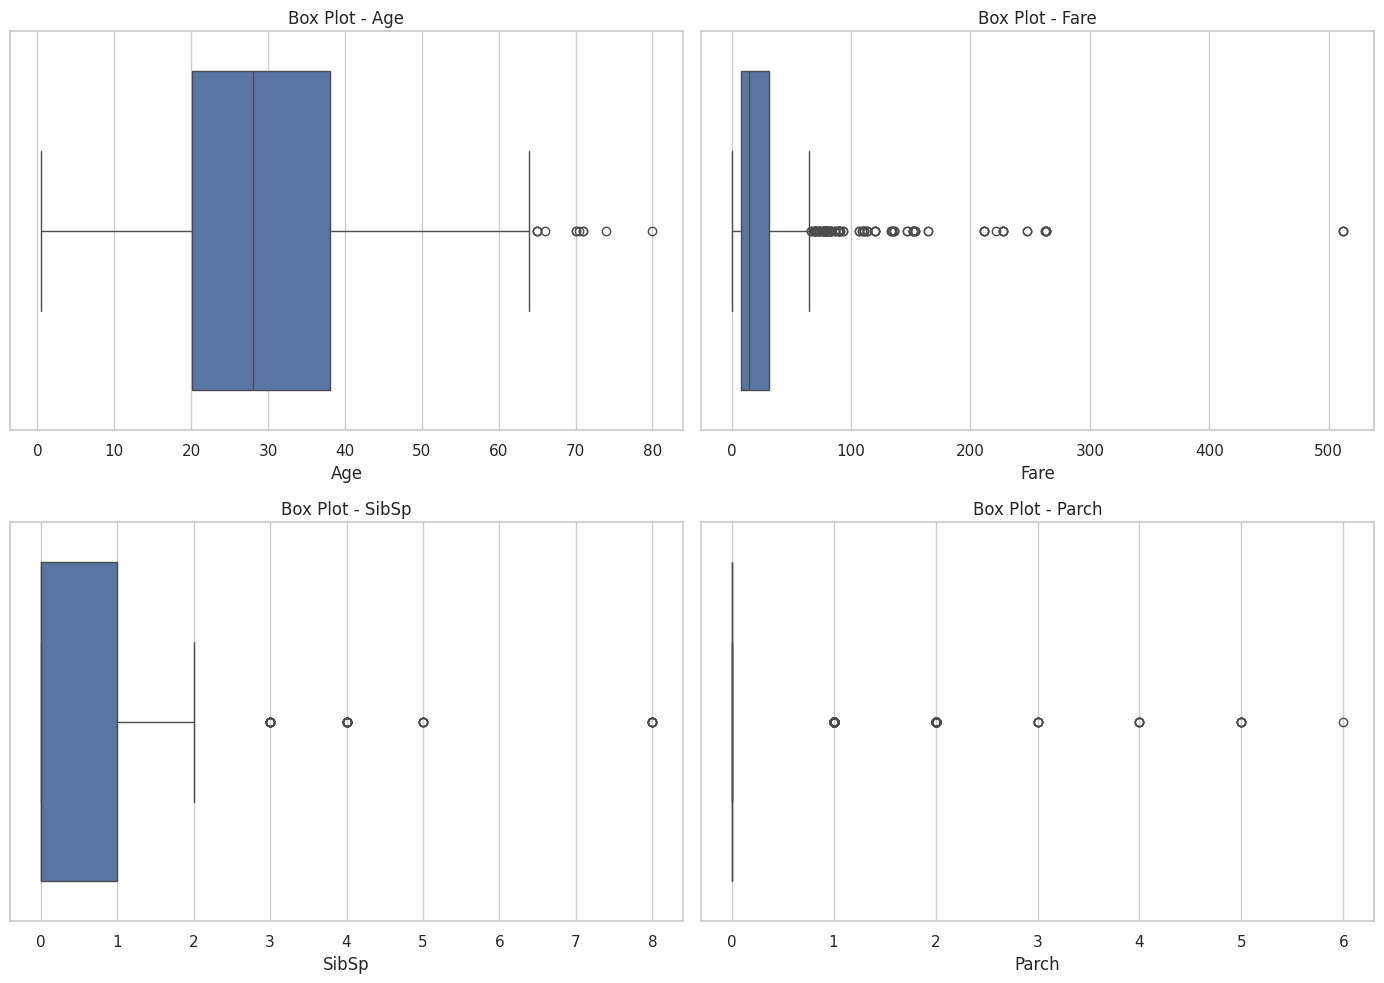

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting histograms for numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

titanic_df[numerical_features].hist(bins=20, figsize=(14,10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plotting box plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x=titanic_df[feature], ax=axes[idx//2, idx%2])
    axes[idx//2, idx%2].set_title(f'Box Plot - {feature}')

plt.tight_layout()
plt.show()

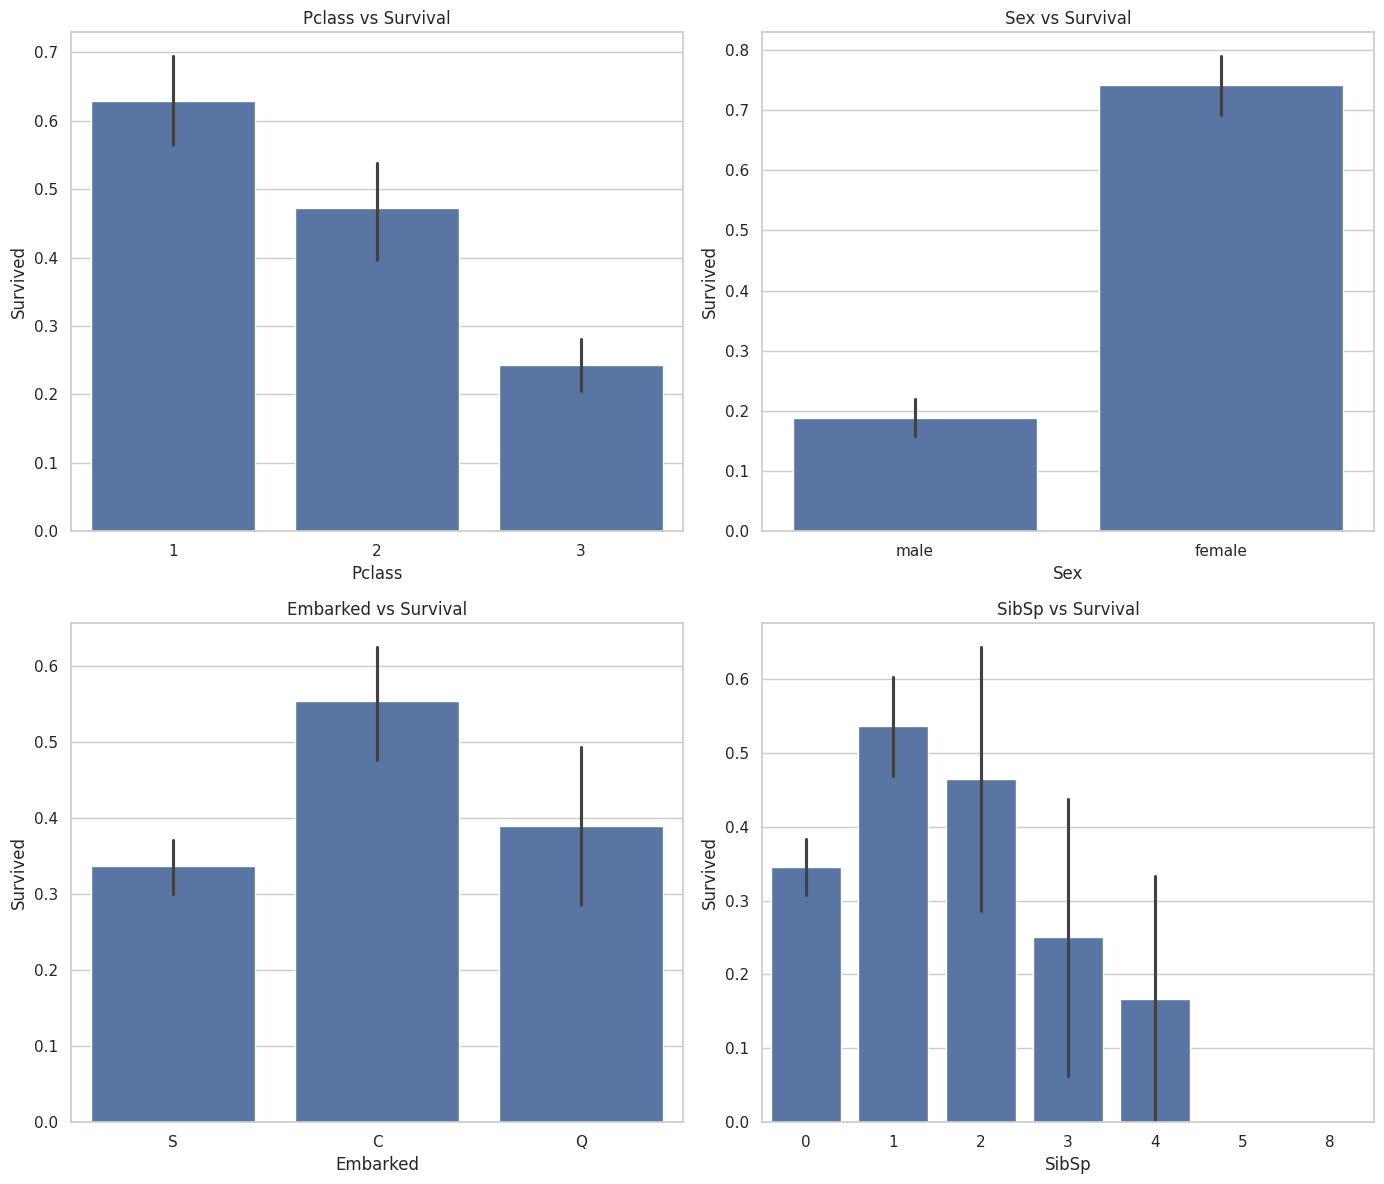

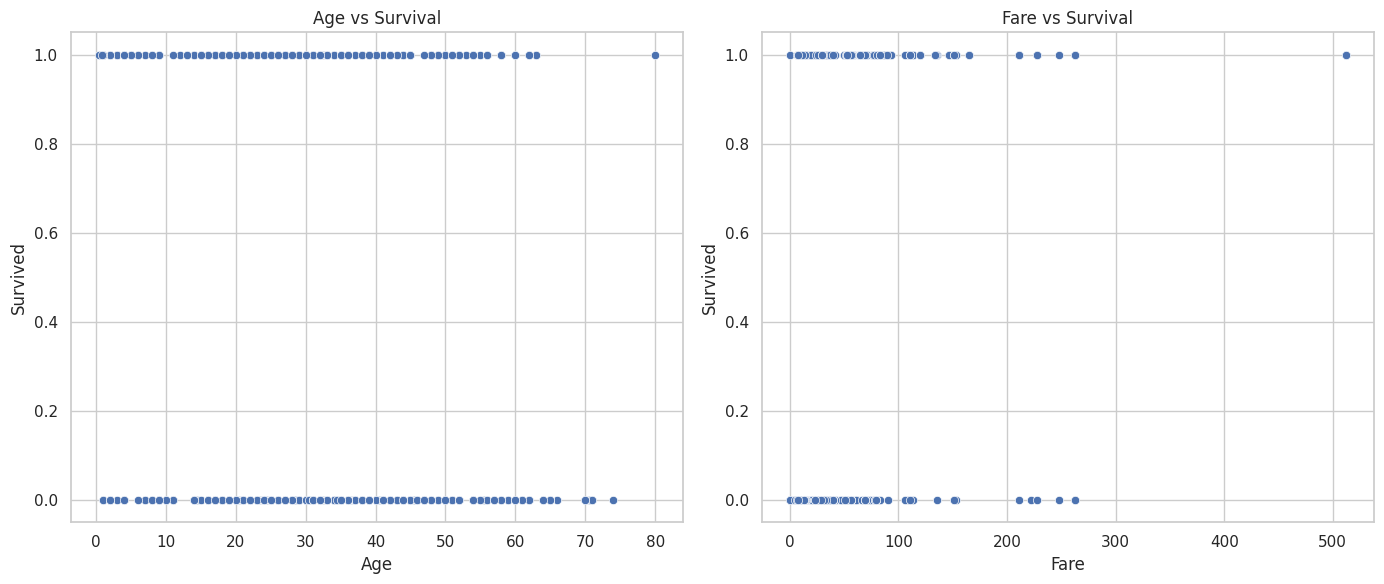

In [6]:
# Bar plot for categorical features vs Survival
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ax=axes[0, 0])
axes[0, 0].set_title('Pclass vs Survival')

# Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Sex vs Survival')

# Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Embarked vs Survival')

# SibSp (Number of siblings/spouses) vs Survival
sns.barplot(x='SibSp', y='Survived', data=titanic_df, ax=axes[1, 1])
axes[1, 1].set_title('SibSp vs Survival')

plt.tight_layout()
plt.show()

# Scatter plot for numerical features vs Survival
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age vs Survival
sns.scatterplot(x='Age', y='Survived', data=titanic_df, ax=axes[0])
axes[0].set_title('Age vs Survival')

# Fare vs Survival
sns.scatterplot(x='Fare', y='Survived', data=titanic_df, ax=axes[1])
axes[1].set_title('Fare vs Survival')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.impute import SimpleImputer

# Imputing missing values for 'Age' using the median
age_imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = age_imputer.fit_transform(titanic_df[['Age']])

# Imputing missing values for 'Embarked' using the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_df['Embarked'] = embarked_imputer.fit_transform(titanic_df[['Embarked']]).ravel()

# Imputing missing values for 'Fare' if any, using the median
fare_imputer = SimpleImputer(strategy='median')
titanic_df['Fare'] = fare_imputer.fit_transform(titanic_df[['Fare']]).ravel() # Reshape the output from fit_transform to be 1-dimensional


# Verifying if all missing values have been handled
missing_values_post_imputation = titanic_df.isnull().sum()
print(missing_values_post_imputation)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [8]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode 'Sex', 'Embarked', and 'Pclass' categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Display the updated DataFrame with encoded features
titanic_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True,False,True


In [9]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
titanic_df[numerical_features] = scaler.fit_transform(titanic_df[numerical_features])

# Display the dataset after scaling
titanic_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,NaN,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,0.432793,-0.473674,PC 17599,0.786845,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,0.432793,-0.473674,113803,0.420730,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",0.433312,-0.474545,-0.473674,373450,-0.486337,NaN,True,False,True,False,True


In [10]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop(columns=['Survived'])  # Drop the target variable
y = titanic_df['Survived']  # Target variable (Survival)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (712, 13), (712,)
Testing set shape: (179, 13), (179,)


In [12]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Before fitting the model, drop the problematic columns
X_train = X_train.drop(columns=['Name', 'Ticket', 'Cabin'])
X_test = X_test.drop(columns=['Name', 'Ticket', 'Cabin'])

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)  # Now fit with the modified data
lgb_pred = lgb_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  print(f"{model_name} Model:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print("------------------")


evaluate_model(y_test, lgb_pred, "LightGBM")
evaluate_model(y_test, xgb_pred, "XGBoost")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
}

# Create a LightGBM model
lgb_model = lgb.LGBMClassifier()

# Create a StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb,
                               scoring='accuracy', cv=cv, n_jobs=-1)

grid_search_lgb.fit(X_train, y_train)

# Get the best parameters and model
best_params_lgb = grid_search_lgb.best_params_
best_lgb_model = grid_search_lgb.best_estimator_

# Train the best LightGBM model on the full training set
best_lgb_model.fit(X_train, y_train)
lgb_pred = best_lgb_model.predict(X_test)

# Evaluate the best LightGBM model
evaluate_model(y_test, lgb_pred, "Optimized LightGBM")


# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               scoring='accuracy', cv=cv, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Train the best XGBoost model on the full training set
best_xgb_model.fit(X_train, y_train)
xgb_pred = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model
evaluate_model(y_test, xgb_pred, "Optimized XGBoost")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [14]:
def compare_models(y_true, lgb_pred, xgb_pred):
  print("Model Comparison:")
  print("------------------")

  lgb_accuracy = accuracy_score(y_true, lgb_pred)
  xgb_accuracy = accuracy_score(y_true, xgb_pred)
  print(f"Accuracy (LightGBM): {lgb_accuracy:.4f}")
  print(f"Accuracy (XGBoost): {xgb_accuracy:.4f}")

  lgb_precision = precision_score(y_true, lgb_pred)
  xgb_precision = precision_score(y_true, xgb_pred)
  print(f"Precision (LightGBM): {lgb_precision:.4f}")
  print(f"Precision (XGBoost): {xgb_precision:.4f}")

  lgb_recall = recall_score(y_true, lgb_pred)
  xgb_recall = recall_score(y_true, xgb_pred)
  print(f"Recall (LightGBM): {lgb_recall:.4f}")
  print(f"Recall (XGBoost): {xgb_recall:.4f}")

  lgb_f1 = f1_score(y_true, lgb_pred)
  xgb_f1 = f1_score(y_true, xgb_pred)
  print(f"F1-Score (LightGBM): {lgb_f1:.4f}")
  print(f"F1-Score (XGBoost): {xgb_f1:.4f}")
  print("------------------")


# Compare the models after optimization
compare_models(y_test, lgb_pred, xgb_pred)

Model Comparison:
------------------
Accuracy (LightGBM): 0.8045
Accuracy (XGBoost): 0.8045
Precision (LightGBM): 0.8696
Precision (XGBoost): 0.8696
Recall (LightGBM): 0.5797
Recall (XGBoost): 0.5797
F1-Score (LightGBM): 0.6957
F1-Score (XGBoost): 0.6957
------------------


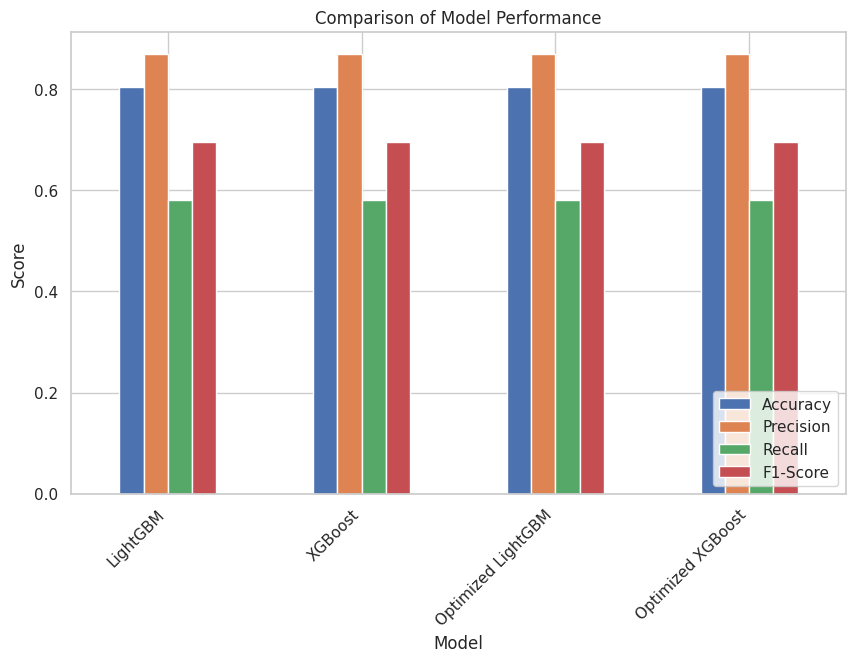

Model Performance Summary:
                    Accuracy  Precision   Recall  F1-Score
LightGBM            0.804469   0.869565  0.57971  0.695652
XGBoost             0.804469   0.869565  0.57971  0.695652
Optimized LightGBM  0.804469   0.869565  0.57971  0.695652
Optimized XGBoost   0.804469   0.869565  0.57971  0.695652


In [15]:
model_performance = {
    'LightGBM': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-Score': 0},
    'XGBoost': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-Score': 0},
    'Optimized LightGBM': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-Score': 0},
    'Optimized XGBoost': {'Accuracy': 0, 'Precision': 0, 'Recall': 0, 'F1-Score': 0},
}

# Function to store the evaluation results
def store_evaluation_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    model_performance[model_name]['Accuracy'] = accuracy
    model_performance[model_name]['Precision'] = precision
    model_performance[model_name]['Recall'] = recall
    model_performance[model_name]['F1-Score'] = f1

# Store results for each model
store_evaluation_results('LightGBM', y_test, lgb_pred)
store_evaluation_results('XGBoost', y_test, xgb_pred)
store_evaluation_results('Optimized LightGBM', y_test, lgb_pred)
store_evaluation_results('Optimized XGBoost', y_test, xgb_pred)

# Create a DataFrame from the model_performance dictionary
performance_df = pd.DataFrame(model_performance).transpose()

# Visualize the performance of different models using a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
performance_df.plot(kind='bar', ax=ax)
plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.show()

print("Model Performance Summary:")
print(performance_df)